<a href="https://colab.research.google.com/github/SenolIsci/ML-Model-Starters/blob/main/LSTM_Autoencoder_models%20multivariate%20multioutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconstruction LSTM Autoencoder
The simplest LSTM autoencoder is one that learns to reconstruct each input sequence.

[0.10693807 0.20421155 0.30191028 0.40018696 0.49917984 0.5983422
 0.6979684  0.79868376 0.90117264]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100)               40800     
                                                                 
 repeat_vector_3 (RepeatVect  (None, 9, 100)           0         
 or)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 9, 100)            80400     
                                                                 
 time_distributed_3 (TimeDis  (None, 9, 1)             101       
 tributed)                                                       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_____________

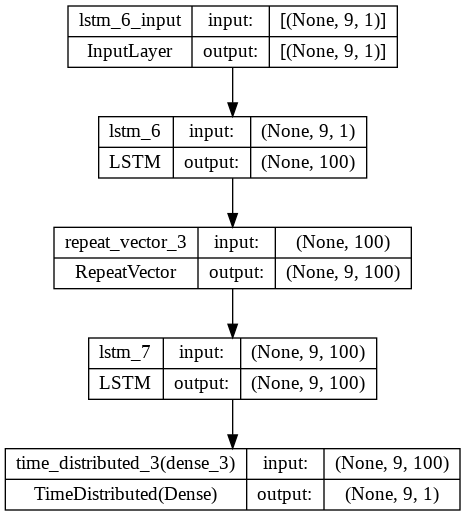

In [ ]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)

# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])
model.summary()
plot_model(model, show_shapes=True)


#Prediction LSTM Autoencoder
We can modify the reconstruction LSTM Autoencoder to instead predict the next step in the sequence.

In the case of our small contrived problem, we expect the output to be the sequence:

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
This means that the model will expect each input sequence to have nine time steps and the output sequence to have eight time steps.

[0.16472603 0.28873703 0.4030725  0.5097336  0.6107107  0.70712256
 0.79991025 0.88988936]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100)               40800     
                                                                 
 repeat_vector_6 (RepeatVect  (None, 8, 100)           0         
 or)                                                             
                                                                 
 lstm_13 (LSTM)              (None, 8, 100)            80400     
                                                                 
 time_distributed_6 (TimeDis  (None, 8, 1)             101       
 tributed)                                                       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_______________________

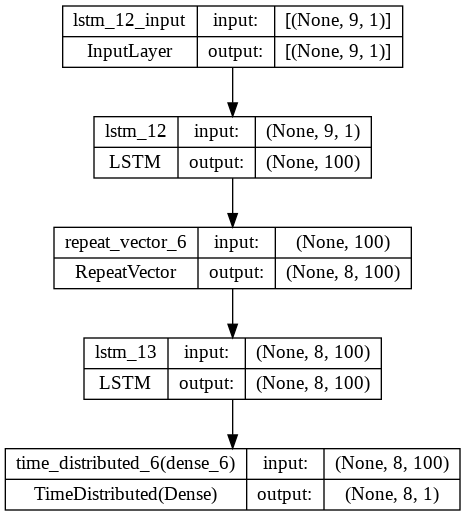

In [ ]:
# lstm autoencoder predict sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(seq_in, seq_out, epochs=300, verbose=0)
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat[0,:,0])
model.summary()
plot_model(model, show_shapes=True)


#Composite LSTM Autoencoder (resontruction and prediction)
Finally, we can create a composite LSTM Autoencoder that has a single encoder and two decoders, one for reconstruction and one for prediction.

We can implement this multi-output model in Keras using the functional API. You can learn more about the functional API in this post:

In [ ]:
# lstm autoencoder reconstruct and predict sequence
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define encoder
visible = Input(shape=(n_in,1))
encoder = LSTM(100, activation='relu')(visible)
# define reconstruct decoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
# define predict decoder
decoder2 = RepeatVector(n_out)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)
# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='composite_lstm_autoencoder.png')
# fit model
model.fit(seq_in, [seq_in,seq_out], epochs=300, verbose=0)
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat)



[array([[[0.10479933],
        [0.19965686],
        [0.29818776],
        [0.3986583 ],
        [0.49982712],
        [0.6007049 ],
        [0.7009458 ],
        [0.8004361 ],
        [0.8992407 ]]], dtype=float32), array([[[0.16456383],
        [0.28796864],
        [0.40254155],
        [0.50986594],
        [0.611226  ],
        [0.7076813 ],
        [0.8001216 ],
        [0.88930786]]], dtype=float32)]


Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 9, 1)]       0           []                               
                                                                                                  
 lstm_111 (LSTM)                (None, 100)          40800       ['input_17[0][0]']               
                                                                                                  
 repeat_vector_51 (RepeatVector  (None, 9, 100)      0           ['lstm_111[0][0]']               
 )                                                                                                
                                                                                                  
 repeat_vector_52 (RepeatVector  (None, 8, 100)      0           ['lstm_111[0][0]']        

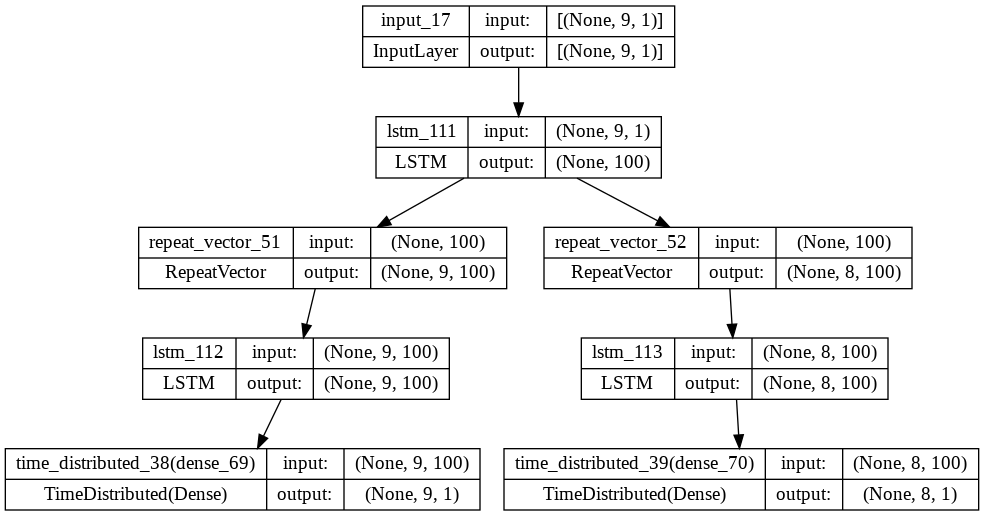

In [ ]:
model.summary()
plot_model(model, show_shapes=True)

In [ ]:

seq_in

array([[[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9]]])

In [ ]:
seq_out

array([[[0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9]]])

In [ ]:
seq_in.shape

(1, 9, 1)

In [ ]:
seq_out.shape

(1, 8, 1)

#Extract LSTM Encoder
Regardless of the method chosen (reconstruction, prediction, or composite), once the autoencoder has been fit, the decoder can be removed and the encoder can be kept as a standalone model.

The encoder can then be used to transform input sequences to a fixed length encoded vector.

We can do this by creating a new model that has the same inputs as our original model, and outputs directly from the end of encoder model, before the RepeatVector layer.

In [ ]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)
# connect the encoder LSTM as the output layer
model = Model(inputs=model.inputs, outputs=model.layers[0].output)

# get the feature vector for the input sequence
yhat = model.predict(sequence)
print(yhat.shape)
print(yhat)


1/1 [==============================] - 0s 158ms/step
(1, 100)
[[0.         0.         0.04009853 0.         0.06237762 0.
  0.         0.         0.05926038 0.         0.         0.
  0.01777113 0.07028631 0.04650023 0.11129661 0.         0.02187557
  0.         0.0583473  0.         0.         0.0791097  0.01871006
  0.         0.11849084 0.         0.06240441 0.02270241 0.
  0.09184257 0.         0.         0.08118322 0.07064191 0.
  0.         0.         0.         0.07500498 0.08546998 0.0338493
  0.         0.02220099 0.09252342 0.         0.02526845 0.
  0.         0.         0.01978844 0.         0.01856635 0.
  0.         0.         0.         0.         0.         0.0050782
  0.05472092 0.11489677 0.         0.         0.06859086 0.
  0.06271474 0.02566895 0.         0.0387726  0.04905013 0.07745542
  0.06308188 0.07511647 0.         0.03145407 0.01468875 0.05362952
  0.         0.         0.         0.03423287 0.07455906 0.
  0.         0.0936963  0.         0.0705509  0.1016

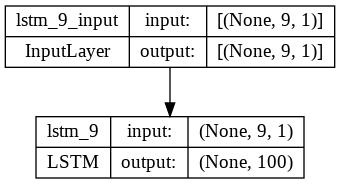

In [ ]:
plot_model(model, show_shapes=True)

#Multivariate LSTM Encoder

This method compresses a multidimensional sequence (think a windowed time series of multiple counts, from sensors or clicks, etc) to a single vector representing this information.

In [1]:
# lstm autoencoder recreate sequence
from numpy import array,hstack,vstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])


in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([1, 2, 3, 4, 5, 6, 7, 8, 9])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])# horizontally stack columns
sequence = vstack((in_seq1, in_seq2)).transpose()
print(sequence)
print(sequence.shape)
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
n_features=n_out=2

sequence = sequence.reshape((1, n_in, 2))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,n_features)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_out)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat)

[[10  1]
 [20  2]
 [30  3]
 [40  4]
 [50  5]
 [60  6]
 [70  7]
 [80  8]
 [90  9]]
(9, 2)
[[[10.073897   0.9894728]
  [19.934505   2.0209005]
  [30.026611   2.9815602]
  [39.985397   3.9899652]
  [50.034607   5.041954 ]
  [60.00616    5.949686 ]
  [70.03091    7.0500727]
  [80.06255    8.018306 ]
  [90.06392    9.033849 ]]]
